In [1]:
import math
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BASEDIR = '/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016/Nominal/combined/'

In [11]:
var_list = [
'b1k',
'b2k',
'b1r',
'b2r',
'b1n',
'b2n',
'b1j',
'b2j',
'b1q',
'b2q',
'c_kk',
'c_rr',
'c_nn',
'c_Prk',
'c_Mrk',
'c_Pnr',
'c_Mnr',
'c_Pnk',
'c_Mnk',
'c_kj',
'c_rq',
'c_han',
'c_tra',
'c_sca',
'c_Prj',
'c_Mrj',
'c_kjL',
'c_rqL',
'c_rkP',
'c_rkM',
'c_nrP',
'c_nrM',
'c_nkP',
'c_nkM',
'll_cHel',
'll_cLab',
'llbar_delta_phi',
'llbar_delta_eta',
]

In [4]:
fileptr_dict = {}
for var in var_list :
    fileptr_dict[var] = uproot.open(BASEDIR + "Allvars_1D_w_new_vars/" + str(var) + ".root")

In [5]:
[k for k in fileptr_dict['b1k'].keys() if 'RespMatSys_Uncorr_CovMatSys' in k]

['b1kRespMatSys_Uncorr_CovMatSys;2',
 'b1kRespMatSys_Uncorr_CovMatSys;1',
 'b1kRespMatSys_Uncorr_CovMatSys_rebinnedA;2',
 'b1kRespMatSys_Uncorr_CovMatSys_rebinnedA;1',
 'b1kRespMatSys_Uncorr_CovMatSys_rebinnedB;2',
 'b1kRespMatSys_Uncorr_CovMatSys_rebinnedB;1',
 'b1kRespMatSys_Uncorr_CovMatSysNorm;2',
 'b1kRespMatSys_Uncorr_CovMatSysNorm;1',
 'b1kRespMatSys_Uncorr_CovMatSysNorm_rebinnedA;2',
 'b1kRespMatSys_Uncorr_CovMatSysNorm_rebinnedA;1',
 'b1kRespMatSys_Uncorr_CovMatSysNorm_rebinnedB;2',
 'b1kRespMatSys_Uncorr_CovMatSysNorm_rebinnedB;1']

In [6]:
fileptr_dict['b1k']['b1kRespMatSys_Uncorr_CovMatSys_rebinnedA'].to_numpy()[0]

array([[ 0.09485601, -0.01857538, -0.0160144 ,  0.00670942,  0.00153978,
        -0.00481558],
       [-0.01857538,  0.0515274 , -0.0035998 , -0.03204268,  0.00190599,
         0.00849964],
       [-0.0160144 , -0.0035998 ,  0.06651724,  0.00296053, -0.0591235 ,
         0.01847456],
       [ 0.00670942, -0.03204268,  0.00296053,  0.06897188,  0.02048999,
        -0.05441135],
       [ 0.00153978,  0.00190599, -0.0591235 ,  0.02048999,  0.11145225,
        -0.06402493],
       [-0.00481558,  0.00849964,  0.01847456, -0.05441135, -0.06402493,
         0.11660993]])

## Load in statistical uncertainty for Allvars

In [7]:
nbinsvar = 6
deltaStatAllVar = []

for var in var_list :
    # Statistical uncertainty from unfolding 
    statcovmat   = fileptr_dict[var][var + 'EmatrixCor_rebinnedA'].to_numpy()[0]
    
    # Statistical uncertainty from limited MC stats
    MCstatcovmat = fileptr_dict[var][var + 'RespMatSys_Uncorr_CovMatSys_rebinnedA'].to_numpy()[0]

    # Add both 
    deltaStatVar = [math.sqrt(statcovmat[i][i] + MCstatcovmat[i][i]) for i in range(nbinsvar)]
    
    deltaStatAllVar.extend(deltaStatVar)
    
    del statcovmat
    del MCstatcovmat
    del deltaStatVar

### Compute matrix with sigma along it's diagnols

In [8]:
deltaStatAllVar   = np.array(deltaStatAllVar)
diag_sigma_matrix = np.zeros((len(deltaStatAllVar), len(deltaStatAllVar)))

for i in range(len(deltaStatAllVar)) :
    diag_sigma_matrix[i][i] = deltaStatAllVar[i]

In [9]:
selfCorrMatrix = np.loadtxt('Correlation_matrix_1000PE_newvars1D.txt')
selfCovMatrix  = np.matmul(np.matmul(diag_sigma_matrix, selfCorrMatrix), diag_sigma_matrix.T)

In [10]:
np.shape(selfCorrMatrix)

(228, 228)

### Compare to the one obtained from the FW

In [11]:
SystematicsAllVars = uproot.open(BASEDIR + "Allvars_1D_w_new_vars/Systematics_AllVars.root")

In [12]:
[k for k in SystematicsAllVars.keys() if 'TotalStat' in k]

['TotalStatCovMatrix_AllVar_rebinnedA;1',
 'TotalStatSystCovMatrix_AllVar_rebinnedA;1',
 'TotalStatCovMatrix_AllVarNorm_rebinnedA;1',
 'TotalStatSystCovMatrix_AllVarNorm_rebinnedA;1']

In [13]:
FWCovMatrix = SystematicsAllVars['TotalStatCovMatrix_AllVar_rebinnedA'].to_hist().to_numpy()[0]
FWCovMatrix = np.round(FWCovMatrix,5)
FWCovMatrix

array([[ 3.83473, -0.87968,  0.17557, ...,  0.1255 , -0.07984,  0.0557 ],
       [-0.87968,  1.71969, -0.42564, ..., -0.0107 ,  0.18786,  0.0984 ],
       [ 0.17557, -0.42564,  2.17779, ...,  0.01668, -0.1254 ,  0.10413],
       ...,
       [ 0.1255 , -0.0107 ,  0.01668, ...,  0.49714, -0.00646, -0.00786],
       [-0.07984,  0.18786, -0.1254 , ..., -0.00646,  0.40286,  0.03514],
       [ 0.0557 ,  0.0984 ,  0.10413, ..., -0.00786,  0.03514,  2.0362 ]])

In [14]:
selfCovMatrix = np.round(selfCovMatrix,5)
selfCovMatrix

array([[ 3.83473, -0.78761, -0.24357, ...,  0.03338, -0.01528,  0.0698 ],
       [-0.78761,  1.71969, -0.36923, ...,  0.07884,  0.01549,  0.106  ],
       [-0.24357, -0.36923,  2.17779, ...,  0.06959,  0.05343,  0.06138],
       ...,
       [ 0.03338,  0.07884,  0.06959, ...,  0.49714, -0.02316,  0.00527],
       [-0.01528,  0.01549,  0.05343, ..., -0.02316,  0.40286,  0.018  ],
       [ 0.0698 ,  0.106  ,  0.06138, ...,  0.00527,  0.018  ,  2.0362 ]])

In [15]:
selfdiag = np.array([selfCovMatrix[i][i] for i in range(228)])
FWdiag   = np.array([FWCovMatrix[i][i] for i in range(228)])

selfdiag.all() == FWdiag.all()

True

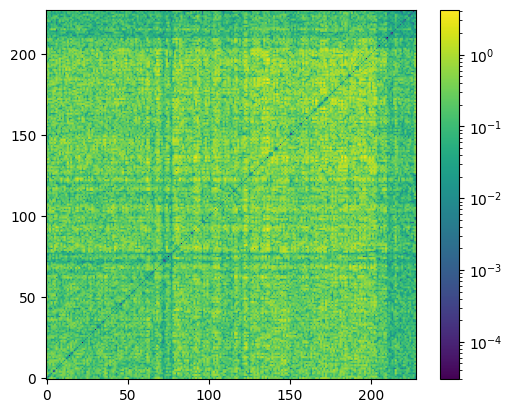

In [17]:
import matplotlib
diff     =  selfCovMatrix - FWCovMatrix
plt.imshow(abs(diff), origin='lower', norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()

/tmp/ipykernel_251214/1406106984.py:1: RuntimeWarning: divide by zero encountered in divide
  rel_diff =  (selfCovMatrix - FWCovMatrix)/FWCovMatrix


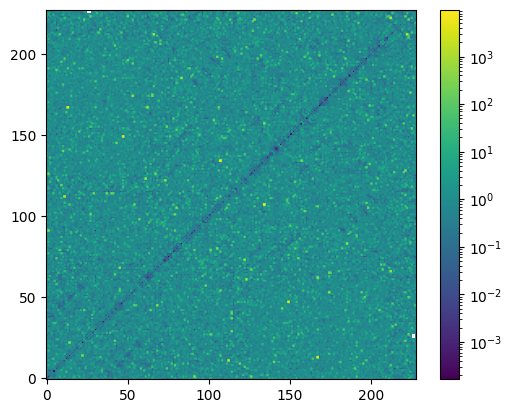

In [18]:
rel_diff =  (selfCovMatrix - FWCovMatrix)/FWCovMatrix
plt.imshow(abs(rel_diff), origin='lower', norm=matplotlib.colors.LogNorm())
plt.colorbar()

### Also compare correlations while you are at it

In [19]:
np.round(selfCorrMatrix,5)

array([[ 1.     , -0.3067 , -0.08428, ...,  0.02417, -0.01229,  0.02498],
       [-0.3067 ,  1.     , -0.19079, ...,  0.08526,  0.01861,  0.05664],
       [-0.08428, -0.19079,  1.     , ...,  0.06688,  0.05704,  0.02915],
       ...,
       [ 0.02417,  0.08526,  0.06688, ...,  1.     , -0.05175,  0.00524],
       [-0.01229,  0.01861,  0.05704, ..., -0.05175,  1.     ,  0.01988],
       [ 0.02498,  0.05664,  0.02915, ...,  0.00524,  0.01988,  1.     ]])

In [20]:
DEPOTDIR    = '/depot/cms/top/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/'
FW_1000_cor = uproot.open(DEPOTDIR  + 'BootstrapCorrelationMatrices_1D_newvars_1000PE_FW.root')['h_RhoBBCorrected_rebinnedA']
FW_1000_cor = FW_1000_cor.to_hist().to_numpy()[0]

np.round(FW_1000_cor,5)

array([[ 1.     , -0.3067 , -0.08427, ...,  0.0242 , -0.01233,  0.02498],
       [-0.3067 ,  1.     , -0.19082, ...,  0.08533,  0.0186 ,  0.05659],
       [-0.08427, -0.19082,  1.     , ...,  0.06685,  0.05709,  0.02977],
       ...,
       [ 0.0242 ,  0.08533,  0.06685, ...,  1.     , -0.05167,  0.00566],
       [-0.01233,  0.0186 ,  0.05709, ..., -0.05167,  1.     ,  0.01947],
       [ 0.02498,  0.05659,  0.02977, ...,  0.00566,  0.01947,  1.     ]])

In [21]:
# Jacob mentioned using delta instead of rel_delta 
delta = (FW_1000_cor - selfCorrMatrix)
delta

# There exist no elements where absolute delta is greater than 0.001
# which is the statistical precision of 10k toys
np.where(abs(delta) > 0.001)

(array([], dtype=int64), array([], dtype=int64))

### The fact that the correlations are the same to about 0.001 and that the diagnols are the same should probably serve as an indicator to the fact that the method works

In [22]:
(selfdiag == FWdiag).all()

True

## Now let's normalize

Consider an observable $x$ and its covariance matrix $\Sigma_x$. The generalized covariance transformation is $\Sigma_y = J \Sigma_x J^T$ where $J$ is the Jacobian matrix:

$J = 
\begin{bmatrix} 
\partial f_0 / \partial x_0 & \partial f_0 / \partial x_1 & \ldots \\
\partial f_1 / \partial x_0 & \partial f_1 / \partial x_1 & \ldots \\
\ldots & & \\
\end{bmatrix}$

Now consider a transformation of $x$ to normalize it: 

$y = \frac{x}{ \sum_i x_i} \equiv \frac{x}{N}$,


Then the Jacobian is,

$J = 
\begin{bmatrix} 
\frac{N-x_0}{N^2}  & \frac{-x_0}{N^2} & \frac{-x_0}{N^2} & \ldots \\
\frac{-x_1}{N^2} & \frac{N-x_1}{N^2} & \frac{-x_1}{N^2} & \ldots \\
\ldots 
\end{bmatrix}$


Coordinate transformations change the uncertainties as,

$\Sigma_y = J \Sigma_x J^T$

where $\sigma_x$ is the covariance matrix, and $y$ is defined above. 

In [23]:
nbinsrhoi   = 6
nbinstot    = nbinsrhoi * len(var_list)
sum_AllVar  = []
hnom_AllVar = []

for var in var_list : 

    # Unfolded result for particular variable
    hnom = fileptr_dict[var][var + 'TUnfResultCor_rebinnedA'].to_hist().values()
    sum_AllVar.append(sum(hnom))
    hnom_AllVar.append(hnom)
    
dfdn  = np.zeros((nbinstot, nbinstot))

for i in range(nbinstot) :
    for j in range(nbinstot) :
        if (i == j) : 
            sum_n =  sum_AllVar[i//nbinsrhoi] # i//nbinsrhoi is var number, so get integral for that variable
            unf_i = hnom_AllVar[i//nbinsrhoi][i%nbinsrhoi] # i%nbinsrhoi is bin number, so list <var> <bin>
            
            dfdn[i][j]  = (sum_n - unf_i) / sum_n**2
            del sum_n, unf_i
            
        elif (i//nbinsrhoi == j//nbinsrhoi) :
            sum_n =  sum_AllVar[i//nbinsrhoi] # i//nbinsrhoi is var number, so get integral for that variable
            unf_i = hnom_AllVar[i//nbinsrhoi][i%nbinsrhoi] # i%nbinsrhoi is bin number, so list <var> <bin>
            
            dfdn[i][j]  = (- unf_i) / sum_n**2
            del sum_n, unf_i
            
        else :
            dfdn[i][j] = 0

In [24]:
112//6 # var_number

18

In [25]:
112%6 # bin_number

4

In [26]:
np.matmul(np.matmul(dfdn, selfCovMatrix), dfdn.T)

array([[ 4.34513457e-06, -1.70819521e-06, -9.83182267e-07, ...,
        -9.58339987e-08, -1.20246373e-07, -5.38811355e-08],
       [-1.70819521e-06,  2.63671127e-06, -5.06512835e-07, ...,
         7.04764628e-09, -4.98639633e-08,  3.50772449e-08],
       [-9.83182267e-07, -5.06512835e-07,  3.17585565e-06, ...,
         2.05237696e-08,  2.54821390e-08, -4.98298616e-09],
       ...,
       [-9.58339987e-08,  7.04764628e-09,  2.05237696e-08, ...,
         6.85736677e-07, -8.62726024e-08, -3.86710649e-07],
       [-1.20246373e-07, -4.98639633e-08,  2.54821390e-08, ...,
        -8.62726024e-08,  5.50890238e-07, -2.66785564e-07],
       [-5.38811355e-08,  3.50772449e-08, -4.98298616e-09, ...,
        -3.86710649e-07, -2.66785564e-07,  2.31540632e-06]])

In [27]:
FWCovMatrix_norm = SystematicsAllVars['TotalStatCovMatrix_AllVarNorm_rebinnedA'].to_hist().to_numpy()[0]
FWCovMatrix_norm

array([[ 4.45687926e-06, -1.83520257e-06, -3.59209474e-07, ...,
         1.07225390e-07, -1.80951647e-07, -1.01025937e-08],
       [-1.83520257e-06,  2.55614485e-06, -6.72275028e-07, ...,
        -1.61051855e-07,  1.68024105e-07, -9.79179153e-09],
       [-3.59209474e-07, -6.72275028e-07,  3.09100988e-06, ...,
        -4.27323472e-08, -2.40083456e-07,  7.31500681e-08],
       ...,
       [ 1.07225390e-07, -1.61051855e-07, -4.27323472e-08, ...,
         7.04776572e-07, -7.52821642e-08, -3.94824527e-07],
       [-1.80951647e-07,  1.68024105e-07, -2.40083456e-07, ...,
        -7.52821642e-08,  5.21790837e-07, -2.59413786e-07],
       [-1.01025937e-08, -9.79179153e-09,  7.31500681e-08, ...,
        -3.94824527e-07, -2.59413786e-07,  2.31974016e-06]])